In [1]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import seaborn as sns

In [2]:
oo = pd.read_csv('/Users/Pandas Project/datafiles/data/olympics.csv',skiprows=4)

## A summary of the total medals won by participating countries in the 2008 Olympis

In [3]:
lo = oo[oo.Edition == 2008]
lo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [4]:
lo.groupby(['NOC','Medal']).size()

NOC  Medal 
AFG  Bronze     1
ALG  Bronze     1
     Silver     1
ARG  Bronze    31
     Gold      20
               ..
UZB  Silver     2
VEN  Bronze     1
VIE  Silver     1
ZIM  Gold       1
     Silver     3
Length: 188, dtype: int64

In [5]:
lo.groupby(['NOC','Medal']).size().unstack('Medal',fill_value=0)

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1,0,0
ALG,1,0,1
ARG,31,20,0
ARM,6,0,0
AUS,76,31,42
...,...,...,...
USA,81,125,109
UZB,3,1,2
VEN,1,0,0


In [15]:
g = lo.groupby(['NOC','Medal']).size().unstack('Medal',fill_value=0)
g = g.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']]
g

Medal,Gold,Silver,Bronze
NOC,,,
USA,125,109,81
CHN,74,53,57
RUS,43,44,56
GER,42,16,43
KOR,41,11,26
...,...,...,...
ISR,0,0,1
MDA,0,0,1
MRI,0,0,1


## Plot as heatmap

<Axes: xlabel='Medal', ylabel='NOC'>

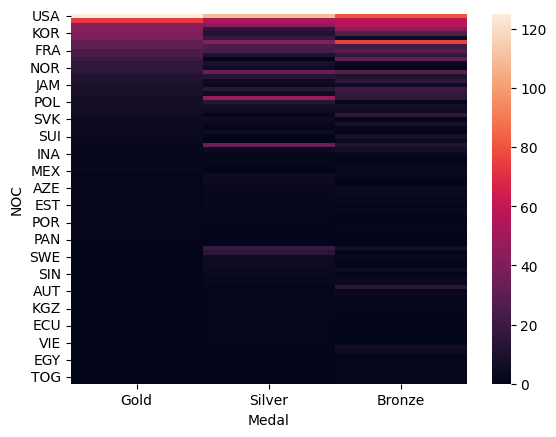

In [22]:
sns.heatmap(g)

In [23]:
g = g.transpose()
g

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


<Axes: xlabel='NOC', ylabel='Medal'>

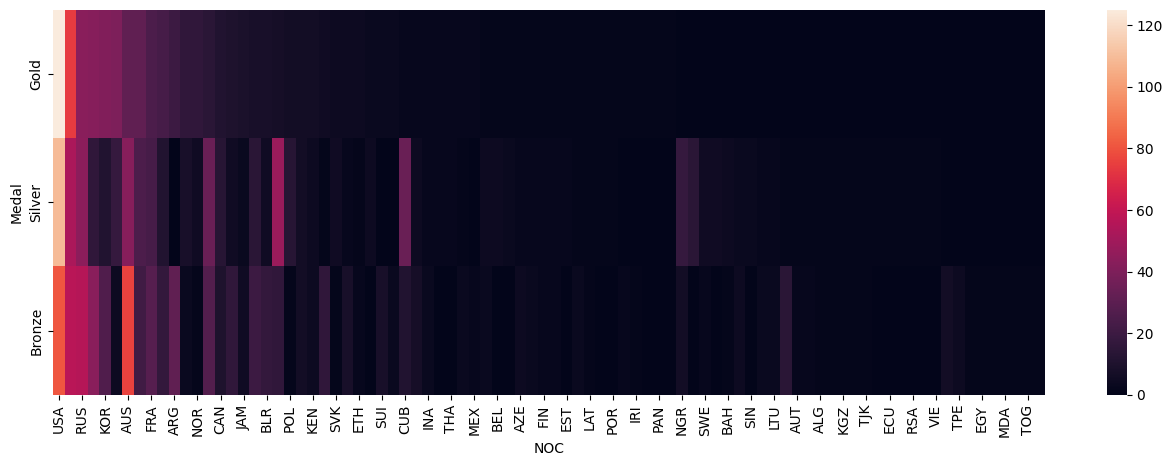

In [25]:
plt.figure(figsize=(16,5))
sns.heatmap(g)

## Creating Colormap

<Axes: xlabel='Athlete'>

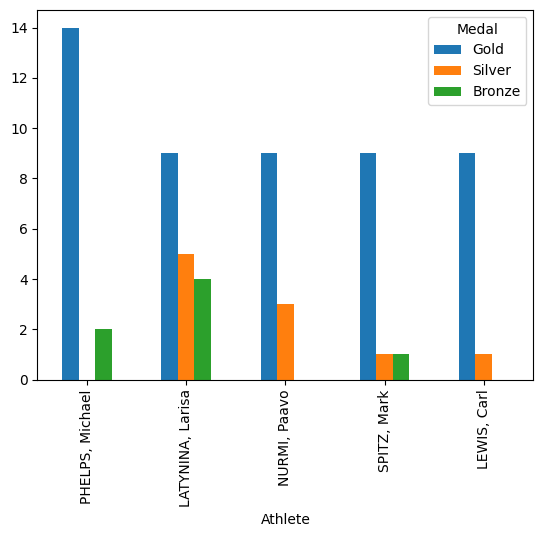

In [27]:
g = oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value=0)
g.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head().plot(kind='bar')

In [28]:
from matplotlib.colors import ListedColormap

In [36]:
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

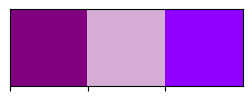

In [41]:
gsb = ['#800080','#d5acd5','#8F00FF']
sns.palplot(sns.color_palette(gsb))

In [43]:
my_gsb = ListedColormap(sns.color_palette(gsb))

<Axes: xlabel='Athlete'>

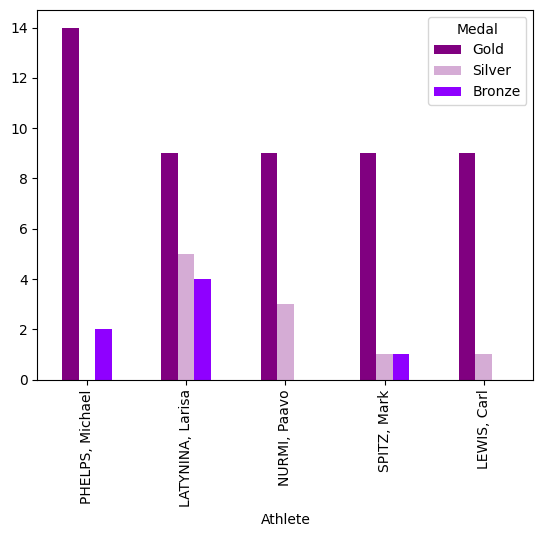

In [44]:
g = oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value=0)
g = g.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head()
g.plot(kind='bar',colormap=my_gsb)